In [178]:
import numpy as np
import pandas as pd
import seaborn as s
from matplotlib.pyplot import axis, figure, savefig, subplots
from matplotlib.transforms import Bbox
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score

In [179]:
c = ["cap_shape","cap_surface","cap_color","bruises","odor","gill_attachment","gill_spacing","gill_size","gill_color","stalk_shape","stalk_root","stalk_surface_above_ring","stalk_surface_below_ring","stalk_color_above_ring","stalk_color_below_ring","veil_type","veil_color","ring_number","ring_type","spore_print_color","population","habitat"]
df = pd.read_csv("agaricus-lepiota.csv", names = c)
df = df.reset_index()
df = df.rename(columns = {"index":"target"})
df.stalk_root[df.stalk_root == "?"] = "missing"

In [180]:
df.cap_shape[df.cap_shape == "b"] = "bell"
df.cap_shape[df.cap_shape == "c"] = "conical"
df.cap_shape[df.cap_shape == "x"] = "convex"
df.cap_shape[df.cap_shape == "f"] = "flat"
df.cap_shape[df.cap_shape == "k"] = "knobbed"
df.cap_shape[df.cap_shape == "s"] = "sunken"

df.cap_surface[df.cap_surface == "f"] = "fibrous"
df.cap_surface[df.cap_surface == "g"] = "grooves"
df.cap_surface[df.cap_surface == "y"] = "scaly"
df.cap_surface[df.cap_surface == "s"] = "smooth"

In [181]:
Y = df.target
Y[Y == "e"] = 0
Y[Y == "p"] = 1
Y = Y.astype(int)
X = pd.get_dummies(df.drop("target", axis = 1))

In [199]:
tree = DecisionTreeClassifier(criterion = "gini",splitter = "best")
metrics = cross_validate(tree, X, Y, cv = 20, scoring = ["accuracy", "roc_auc","recall"])
print(metrics["test_accuracy"].mean())
print(metrics["test_roc_auc"].mean())
print(metrics["test_recall"].mean())

1.0
1.0
1.0


Accuracy: 1.0
Recall:   1.0


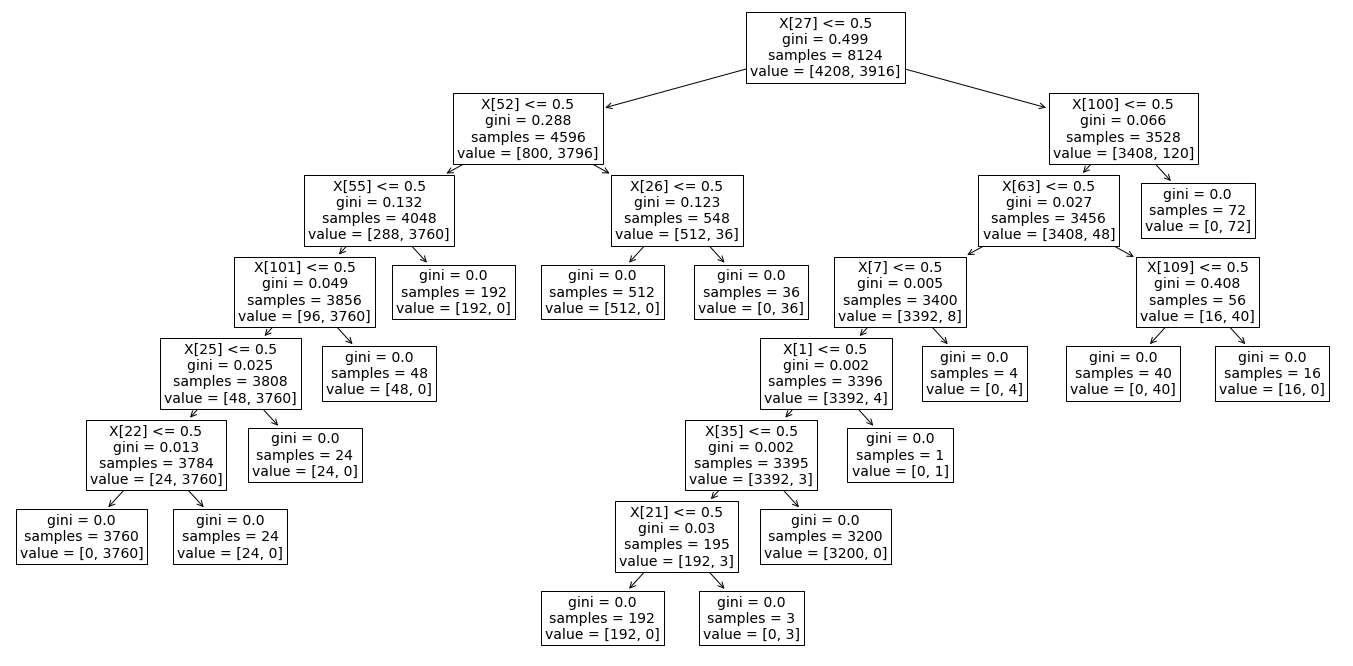

In [189]:
tree.fit(X,Y)
fig, ax = subplots(figsize=(24, 12))  # whatever size you want
plot_tree(tree, fontsize = 14)
print("Accuracy: " + str(accuracy_score(tree.predict(X),Y)))
print("Recall:   " + str(recall_score(tree.predict(X),Y)))

1.0
1.0
1.0
Accuracy: 1.0
Recall:   1.0


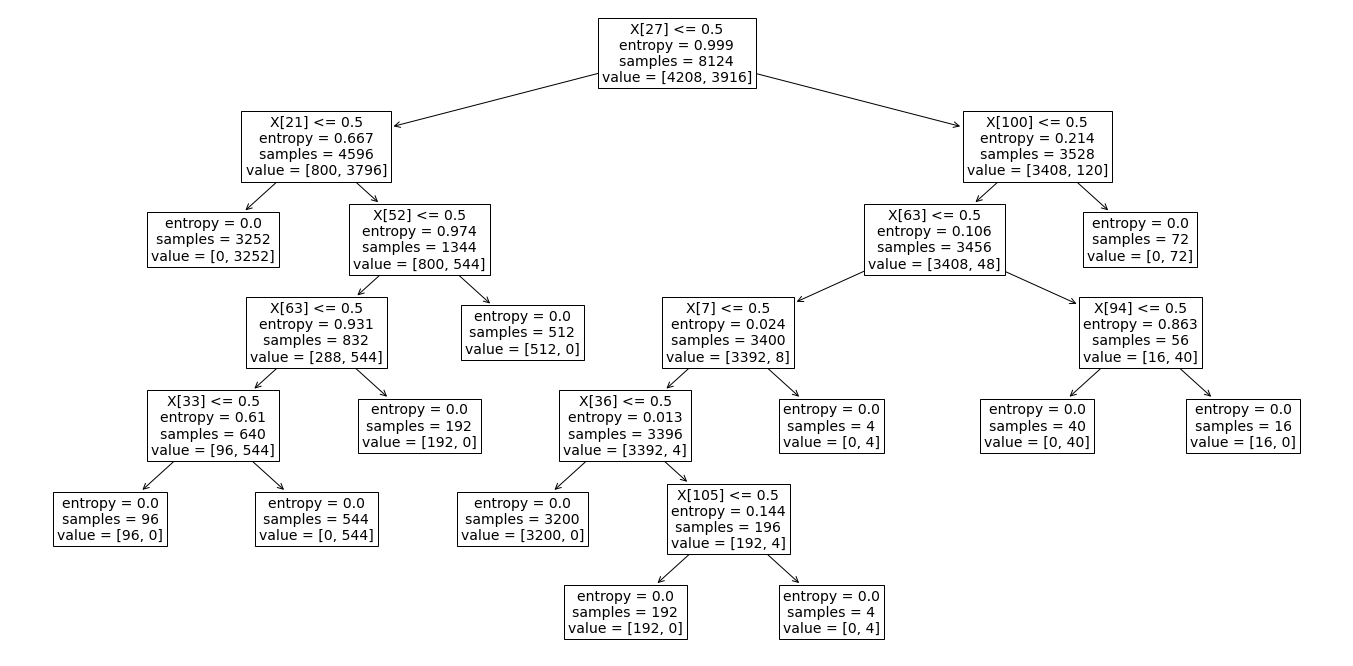

In [204]:
tree = DecisionTreeClassifier(criterion = "entropy",splitter = "best")
metrics = cross_validate(tree, X, Y, cv = 20, scoring = ["accuracy", "roc_auc","recall"])
print(metrics["test_accuracy"].mean())
print(metrics["test_roc_auc"].mean())
print(metrics["test_recall"].mean())

tree.fit(X,Y)
fig, ax = subplots(figsize=(24, 12))  # whatever size you want
plot_tree(tree, fontsize = 14)
print("Accuracy: " + str(accuracy_score(tree.predict(X),Y)))
print("Recall:   " + str(recall_score(tree.predict(X),Y)))

0.9438335895232447
0.9762854227936681
0.9479591836734695
Accuracy: 0.9615952732644018
Recall:   0.9278252611585945


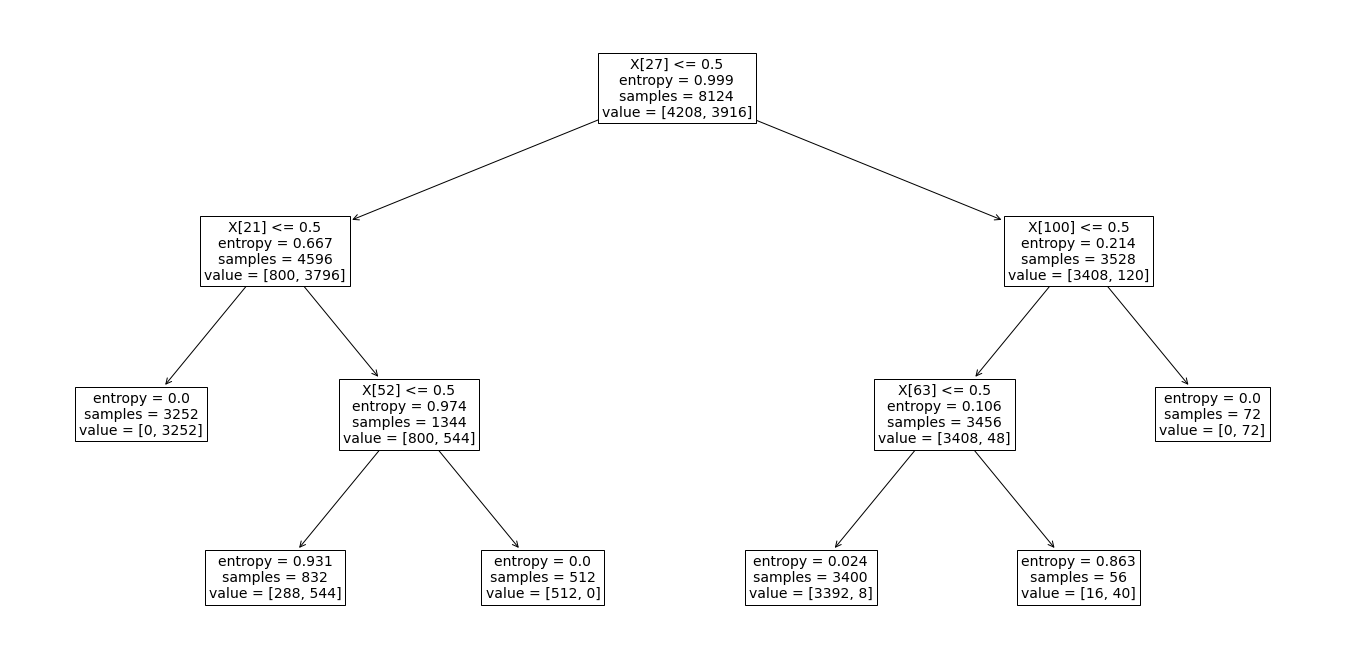

In [207]:
tree = DecisionTreeClassifier(criterion = "entropy",splitter = "best", max_depth = 3)
metrics = cross_validate(tree, X, Y, cv = 20, scoring = ["accuracy", "roc_auc","recall"])
print(metrics["test_accuracy"].mean())
print(metrics["test_roc_auc"].mean())
print(metrics["test_recall"].mean())

tree.fit(X,Y)
fig, ax = subplots(figsize=(24, 12))  # whatever size you want
plot_tree(tree, fontsize = 14)
print("Accuracy: " + str(accuracy_score(tree.predict(X),Y)))
print("Recall:   " + str(recall_score(tree.predict(X),Y)))

0.9456433594364629
0.9699676661717236
0.9107142857142858
Accuracy: 0.9852289512555391
Recall:   0.972139303482587


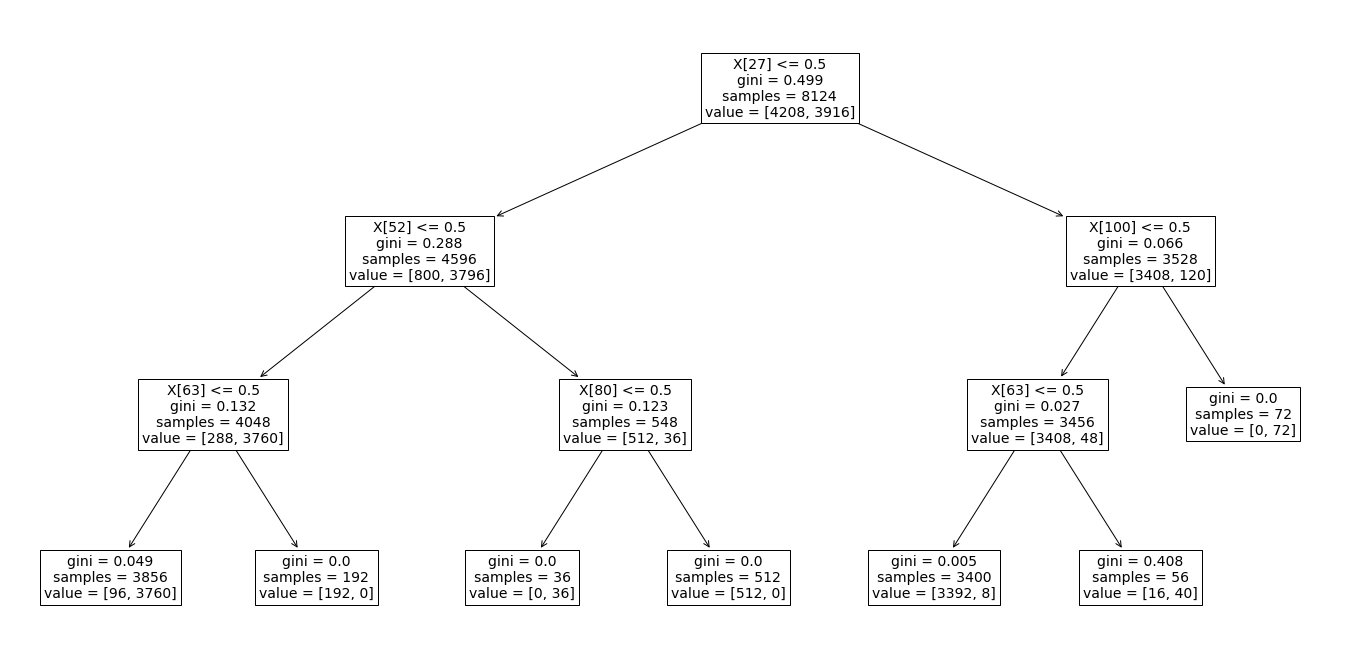

In [208]:
tree = DecisionTreeClassifier(criterion = "gini",splitter = "best", max_depth = 3)
metrics = cross_validate(tree, X, Y, cv = 20, scoring = ["accuracy", "roc_auc","recall"])
print(metrics["test_accuracy"].mean())
print(metrics["test_roc_auc"].mean())
print(metrics["test_recall"].mean())

tree.fit(X,Y)
fig, ax = subplots(figsize=(24, 12))  # whatever size you want
plot_tree(tree, fontsize = 14)
print("Accuracy: " + str(accuracy_score(tree.predict(X),Y)))
print("Recall:   " + str(recall_score(tree.predict(X),Y)))

In [213]:
alpha = {"ccp_alpha": [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0]}
tree = DecisionTreeClassifier(criterion = "gini",splitter = "best")
search = GridSearchCV(tree, param_grid = alpha, scoring = "recall", cv = 20)
search.fit(X,Y)

GridSearchCV(cv=20, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'ccp_alpha': [1000, 100, 10, 1, 0.1, 0.01, 0.001,
  

In [219]:
print(search.best_score_)
print(search.best_params_)

1.0
{'ccp_alpha': 0.0001}


In [220]:
alpha = {"ccp_alpha": [0.00005, 0.0001, 0.0002,0.0003,0.0004,0.0005]}
tree = DecisionTreeClassifier(criterion = "gini",splitter = "best")
search = GridSearchCV(tree, param_grid = alpha, scoring = "recall", cv = 20)
search.fit(X,Y)

GridSearchCV(cv=20, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'ccp_alpha': [5e-05, 0.0001, 0.0002, 0.0003, 0.0004,

In [221]:
print(search.best_score_)
print(search.best_params_)

1.0
{'ccp_alpha': 5e-05}


Accuracy: 1.0
Recall:   1.0


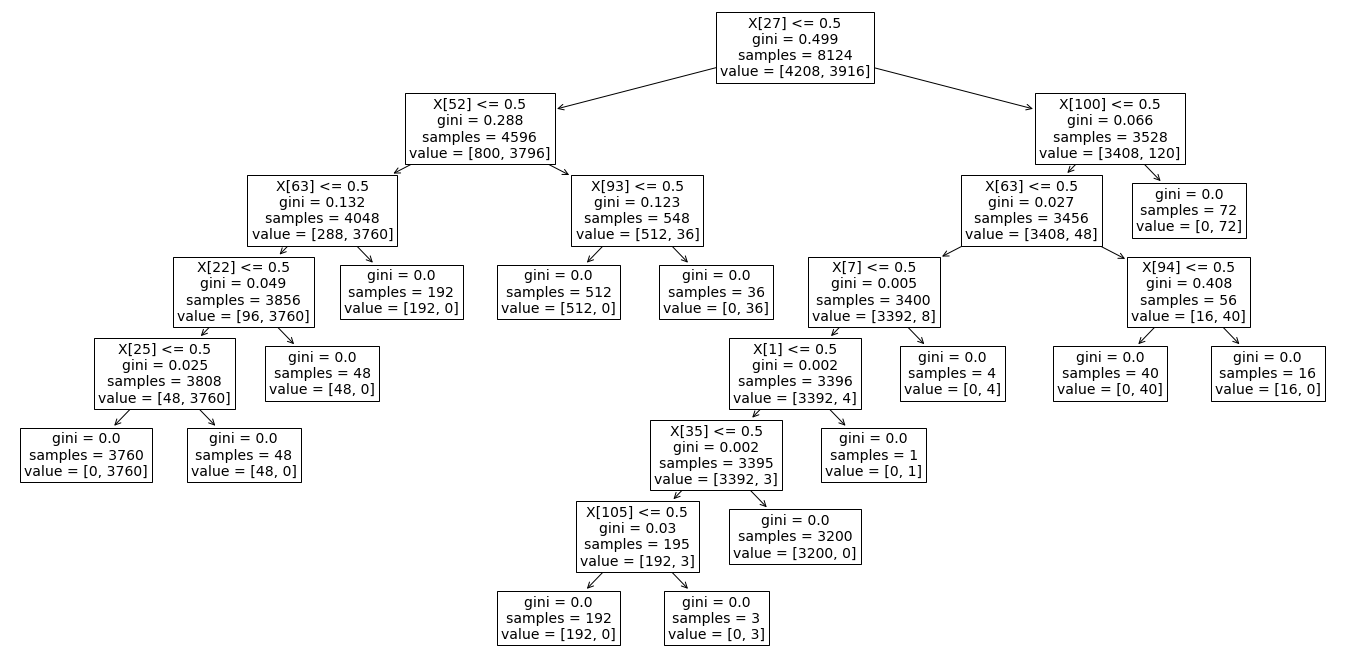

In [222]:
best.fit(X, Y)

fig, ax = subplots(figsize=(24, 12))  # whatever size you want
plot_tree(best, fontsize = 14)
print("Accuracy: " + str(accuracy_score(best.predict(X),Y)))
print("Recall:   " + str(recall_score(best.predict(X),Y)))